In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!ls

'August 3 standup.gdoc'   Classroom  'Rubrics design + GPT3 challenge.gdoc'


Data Cleaning is one of the essential step towards making real meaning of any dataset. It makes the data ready for modelling and analysis.

Here you will be learning how to do data cleaning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
db = pd.read_csv('/diabetic_data.csv', na_values=['?', None])
db.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Before Cleaning a dataset, you need to explore what has been stored in it. The column names, how many data points,
number of colum etc. All these questions needs to be answered

In [ ]:
# column names
db.columns.tolist()

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted',
 'fix_readmitted',
 'fix_age']

For better understanding of the columns, Exploring the data description [here](https://docs.google.com/spreadsheets/d/1pcNqeUeIph6xAQzlI54KCvi8HM91SUNeeDbdOq3rvbE/edit#gid=784155610) will help

In [ ]:
# number of data points
print(f" There are {db.shape[0]} rows and {db.shape[1]} columns")

 There are 101766 rows and 52 columns


## Handling Missing Values

In [ ]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Diabetes dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)

The Diabetes dataset contains 7.07 % missing values.


In [ ]:
# Now which column(s) has missing values
db.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Well, Looks like some columns has alot of missing values.

Up Next How to fix missing values

Fixing Missing values is a crucial part of any data science/ML project because you might be making the data better by your method or otherwise. So your decision has to be perfect or close enough.

The rule of thumb is for all object datatype kind of column/features use the mode method to fill the missing datapoints and for number kind of features use the mean/median method.

The question now is how to choose which method to fill a number feature with. Well the simple answer is check if it is skewed. Now what is skew?

Back to the rule of thumb, if the data is not skewed, filling with either mean or median will work well. But if it is indeed skew, then fill with Median. The idea is ....

Other method of dealing with missing values exists like fill-forward,backward-fill etc

You also need to consider what the column represent before you fill missing values for example:  ...

Another easy way to do this is to just drop all misisng rows and moving on with analysis if you have data left atleast.

In [ ]:
# drop columns with more than 30% missing values
df_clean = db.drop(['weight', 'payer_code', 'medical_specialty', 'max_glu_serum', 'A1Cresult'], axis=1)
df_clean.shape

(101766, 47)

In [ ]:
# fill missing with ffill method for columns (diag_1, diag_2, diag_3)

def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]


def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

df_clean['diag_1'] = fix_missing_ffill(df_clean, 'diag_1')
df_clean['diag_2'] = fix_missing_ffill(df_clean, 'diag_2')
df_clean['diag_3'] = fix_missing_ffill(df_clean, 'diag_3')

# fill 'race' column with mode 
df_clean['race'] = df_clean['race'].fillna(df_clean['race'].mode()[0])

Other missing columns can be fixed based on your understanding, you can decide to drop or fill using appropriate methods. Whichever you decide, explain your reasons  

## Transforming Data

**Scaling and Normalization**

Scaling vs. Normalization: What's the difference?

One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:

    - in scaling, you're changing the range of your data, while
    - in normalization, you're changing the shape of the distribution of your data.

Scaling

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN). With these algorithms, a change of "1" in any numeric feature is given the same importance.

For example, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices, methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! This clearly doesn't fit with our intuitions of the world. With currency, you can convert between currencies. But what about if you're looking at something like height and weight? It's not entirely clear how many pounds should equal one inch (or how many kilograms should equal one meter).




In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
859,155.14
1323,147.33
1816,185.96
1790,16.09
1838,0.99


In [ ]:
original_data[0].min(), original_data[0].max()

(0.025832767423107042, 2354.241908598895)

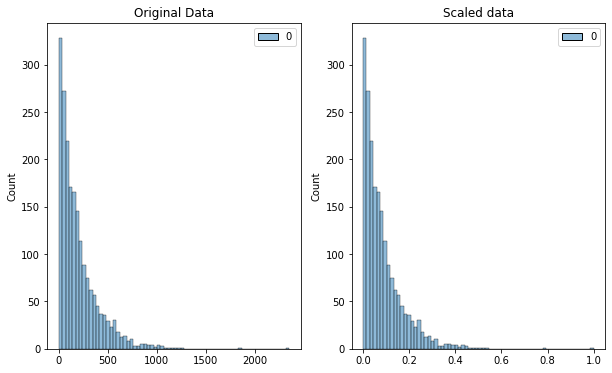

In [ ]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

    Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method you will be using to normalize here is called the Normalizer method from sklearn. Let's take a quick peek at what normalizing some data looks like:

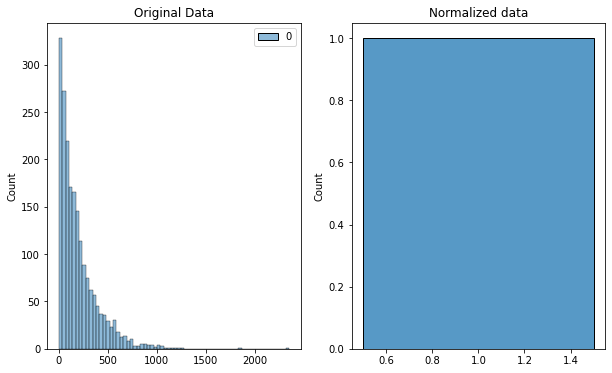

In [ ]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [ ]:
# check datatypes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

In [ ]:
def fix_age(col):
    weight = [x.replace( '[', '' ).replace( ')', '' ) for x in col.fillna('') ]
    new_age = [ ( ( int(i.split('-')[0] ) + int( i.split('-')[1] ) ) / 2)  for i in weight]
    return weight

df_clean['fix_age'] = fix_age(df_clean['age'])

In [ ]:
df_clean['diag_1'] = pd.to_numeric(df_clean['diag_1'], errors='coerce')
df_clean['diag_2'] = pd.to_numeric(df_clean['diag_2'], errors='coerce')
df_clean['diag_3'] = pd.to_numeric(df_clean['diag_3'], errors='coerce')

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  int64  
 1   patient_nbr               101766 non-null  int64  
 2   race                      101766 non-null  object 
 3   gender                    101766 non-null  object 
 4   age                       101766 non-null  object 
 5   admission_type_id         101766 non-null  int64  
 6   discharge_disposition_id  101766 non-null  int64  
 7   admission_source_id       101766 non-null  int64  
 8   time_in_hospital          101766 non-null  int64  
 9   num_lab_procedures        101766 non-null  int64  
 10  num_procedures            101766 non-null  int64  
 11  num_medications           101766 non-null  int64  
 12  number_outpatient         101766 non-null  int64  
 13  number_emergency          101766 non-null  i

In [ ]:
df_clean['fix_age'].unique()

array(['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70',
       '70-80', '80-90', '90-100'], dtype=object)

In [ ]:
df_clean['age'] = [ ((int(i.split('-')[0]) + int(i.split('-')[1])) / 2)  for i in df_clean['fix_age']]

## Utility Functions

In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]


###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


pd.options.display.float_format = format_float

## Extracting Data

In [ ]:
db['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [ ]:
percent_missing(df_clean)

The Diabetes dataset contains 0.19 % missing values.


In [ ]:
missing_values_table(df_clean)

Your selected dataframe has 47 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values,Dtype
diag_3,5131,5.00,float64
diag_2,2538,2.50,float64
diag_1,1645,1.60,float64


In [ ]:
def map_readmitted(col):
    readmitted_map = {'NO' : 'NO', '>30': 'YES', '<30': 'YES'}
    return col.map(readmitted_map)

db['fix_readmitted'] = map_readmitted(db['readmitted'])

In [ ]:
# unique encounter id
db['change'].unique()

array(['No', 'Ch'], dtype=object)

In [ ]:
db.shape

(101766, 52)

In [ ]:
db['weight'].value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

In [ ]:
db['fix_age'] = fix_age(db['age'])

In [ ]:
db['fix_age'].value_counts()

70-80     26068
60-70     22483
50-60     17256
80-90     17197
40-50      9685
30-40      3775
90-100     2793
20-30      1657
10-20       691
0-10        161
Name: fix_age, dtype: int64

## Exploration

Data Exploration or Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics which include:


*   detection of mistakes, outliers or abnormalities
*   determining relationships among the explanatory variables
*   assessing the relationships between explanatory and outcome variables





In [ ]:
dfExp = df_clean.copy()
dfExp

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,fix_readmitted,fix_age
0,2278392,8222157,Caucasian,Female,5.00,6,25,1,1,41,...,No,No,No,No,No,No,No,NO,NO,0-10
1,149190,55629189,Caucasian,Female,15.00,1,1,7,3,59,...,No,No,No,No,No,Ch,Yes,>30,YES,10-20
2,64410,86047875,AfricanAmerican,Female,25.00,1,1,7,2,11,...,No,No,No,No,No,No,Yes,NO,NO,20-30
3,500364,82442376,Caucasian,Male,35.00,1,1,7,2,44,...,No,No,No,No,No,Ch,Yes,NO,NO,30-40
4,16680,42519267,Caucasian,Male,45.00,1,1,7,1,51,...,No,No,No,No,No,Ch,Yes,NO,NO,40-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,75.00,1,3,7,3,51,...,No,No,No,No,No,Ch,Yes,>30,YES,70-80
101762,443847782,74694222,AfricanAmerican,Female,85.00,1,4,5,5,33,...,No,No,No,No,No,No,Yes,NO,NO,80-90
101763,443854148,41088789,Caucasian,Male,75.00,1,1,7,1,53,...,No,No,No,No,No,Ch,Yes,NO,NO,70-80
101764,443857166,31693671,Caucasian,Female,85.00,2,3,7,10,45,...,No,No,No,No,No,Ch,Yes,NO,NO,80-90


In [ ]:
dfExp.dtypes

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                       object
age                         float64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                      float64
diag_2                      float64
diag_3                      float64
number_diagnoses              int64
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                    object
glyburide                    object
tolbutamide                 

### Univariate Analysis

This is mainly analysis done on particular variable only i.e we search for the data charecteristics of a variable with disregard to all the other columns

#### distributions

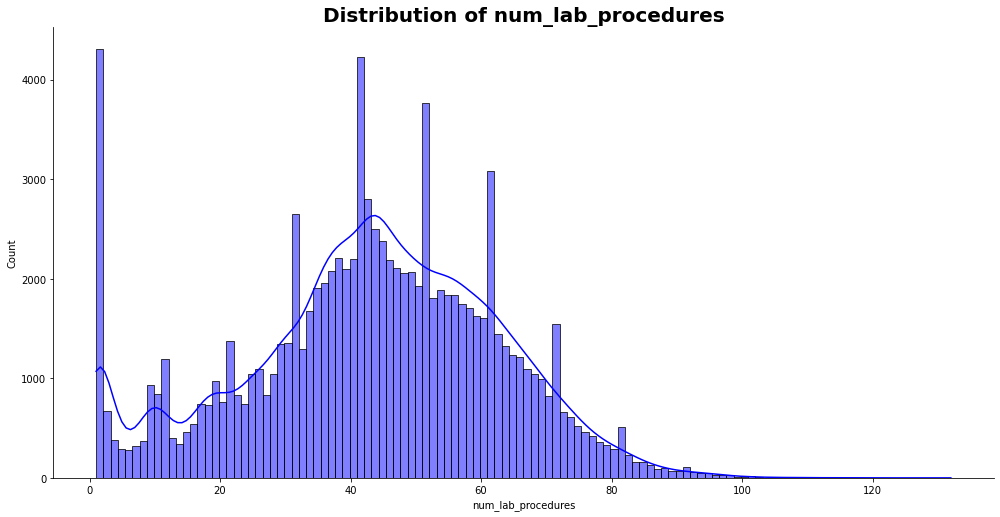

In [ ]:
plot_hist(dfExp, "num_lab_procedures", "blue")

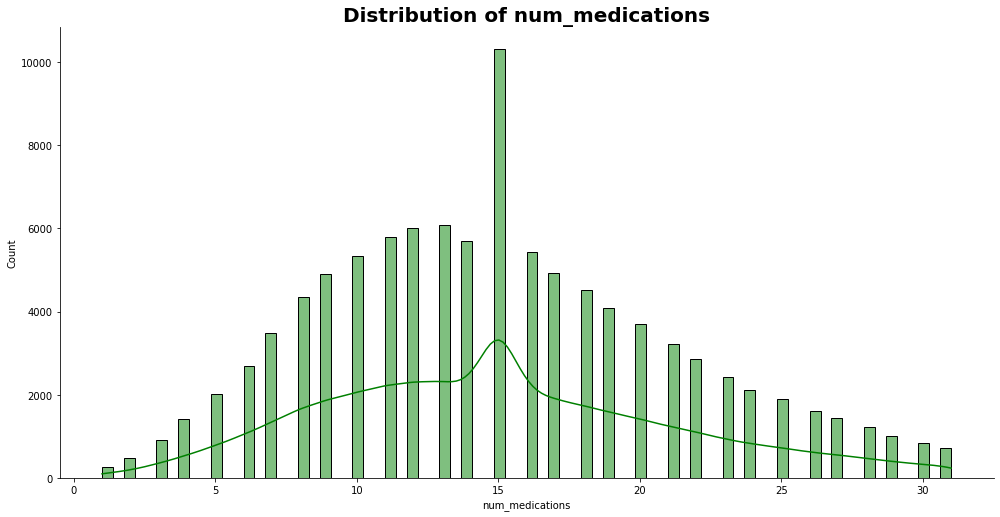

In [ ]:
plot_hist(dfExp, "num_medications", "green")

In [ ]:
dfExp["num_medications"].describe()

count   101,766.00
mean         14.95
std           6.23
min           1.00
25%          10.00
50%          15.00
75%          19.00
max          31.00
Name: num_medications, dtype: float64

#### Outliers

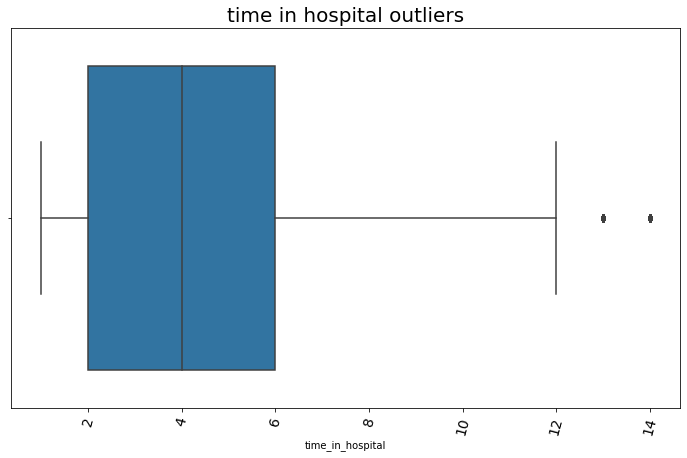

In [ ]:
plot_box(dfExp, "time_in_hospital", "time in hospital outliers")

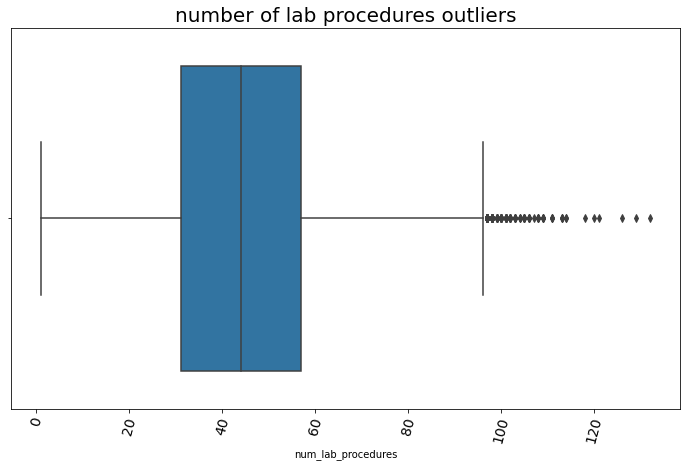

In [ ]:
plot_box(dfExp, "num_lab_procedures", "number of lab procedures outliers")

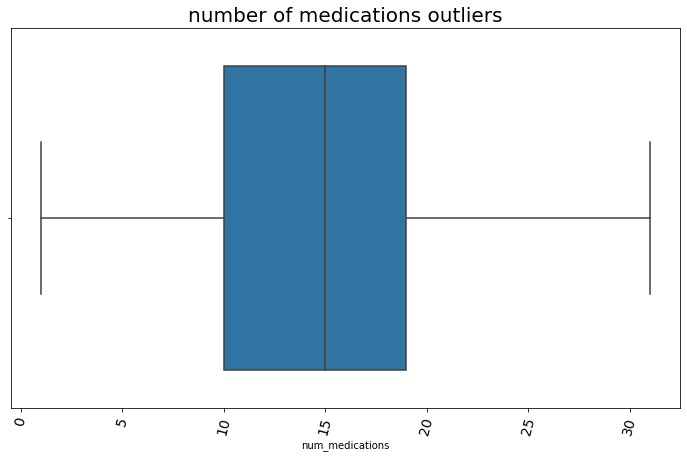

In [ ]:
plot_box(dfExp, "num_medications", "number of medications outliers")

In [ ]:
dfExp["fixed_num_medications"] = fix_outlier(dfExp, "num_medications")

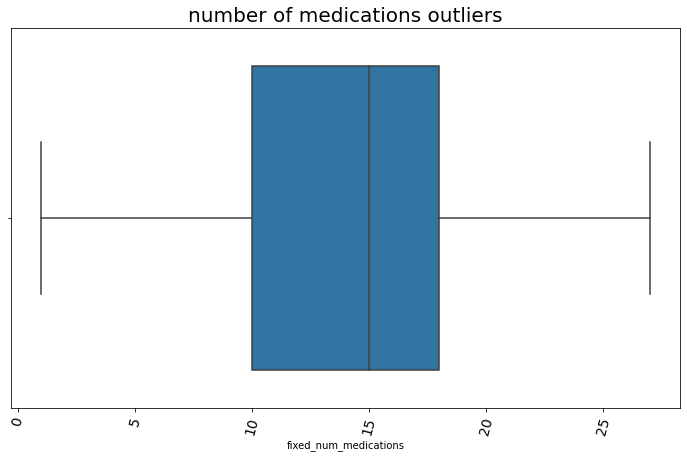

In [ ]:
plot_box(dfExp, "fixed_num_medications", "number of medications outliers")

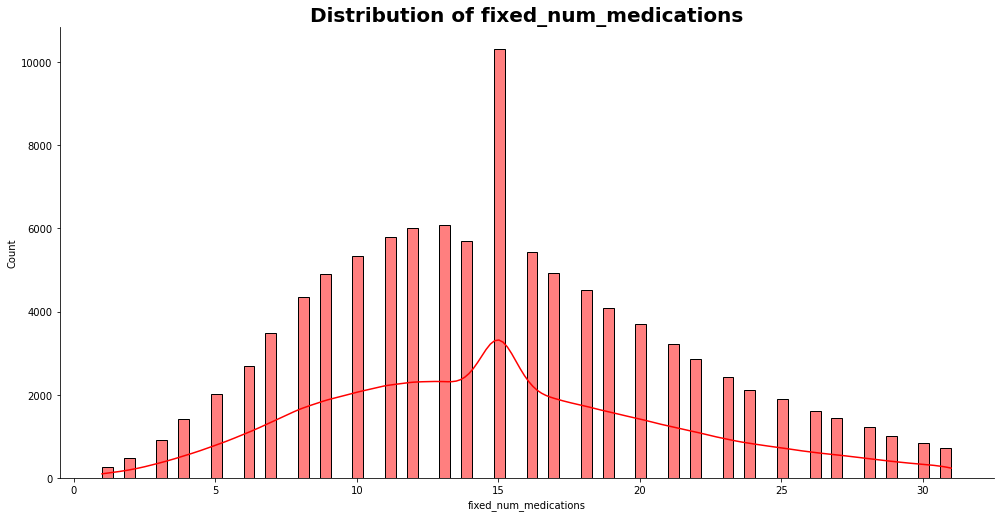

In [ ]:
plot_hist(dfExp, "fixed_num_medications", "red")

In [ ]:
dfExp["fixed_num_medications"].describe()

count   101,766.00
mean         14.42
std           5.55
min           1.00
25%          10.00
50%          15.00
75%          18.00
max          27.00
Name: fixed_num_medications, dtype: float64

In [ ]:
dfExp.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,fix_readmitted,fix_age,fixed_num_medications
0,2278392,8222157,Caucasian,Female,5.00,6,25,1,1,41,...,No,No,No,No,No,No,NO,NO,0-10,1.00
1,149190,55629189,Caucasian,Female,15.00,1,1,7,3,59,...,No,No,No,No,Ch,Yes,>30,YES,10-20,18.00
2,64410,86047875,AfricanAmerican,Female,25.00,1,1,7,2,11,...,No,No,No,No,No,Yes,NO,NO,20-30,13.00
3,500364,82442376,Caucasian,Male,35.00,1,1,7,2,44,...,No,No,No,No,Ch,Yes,NO,NO,30-40,16.00
4,16680,42519267,Caucasian,Male,45.00,1,1,7,1,51,...,No,No,No,No,Ch,Yes,NO,NO,40-50,8.00


#### categorical variables

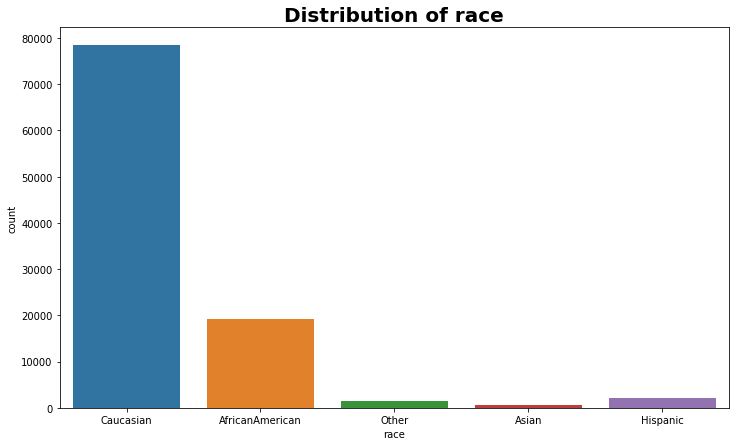

In [ ]:
plot_count(dfExp, "race")

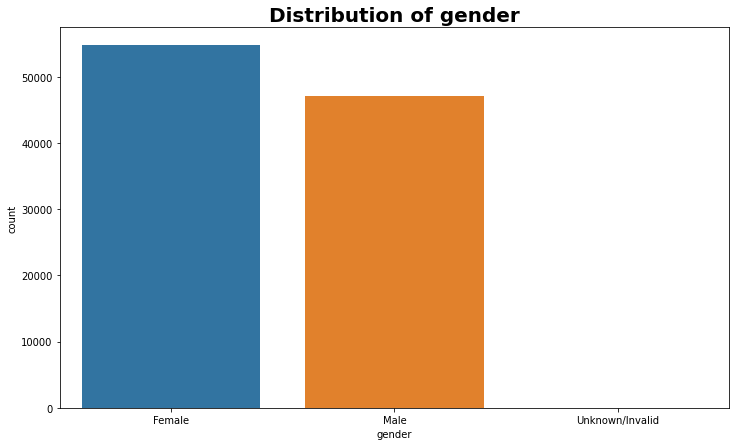

In [ ]:
plot_count(dfExp, "gender")

### Multivariate Analysis

This analysis that mainly done on two or more columns where we look for relationships between columns and how our data is distributed amoung values in multiple columns

#### scatter plots

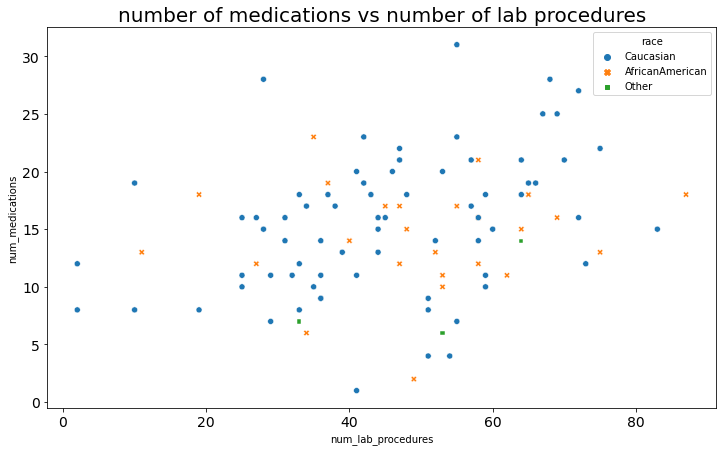

In [ ]:
plot_scatter(dfExp.head(100), x_col="num_lab_procedures", y_col="num_medications", hue="race",
             style="race", title="number of medications vs number of lab procedures")

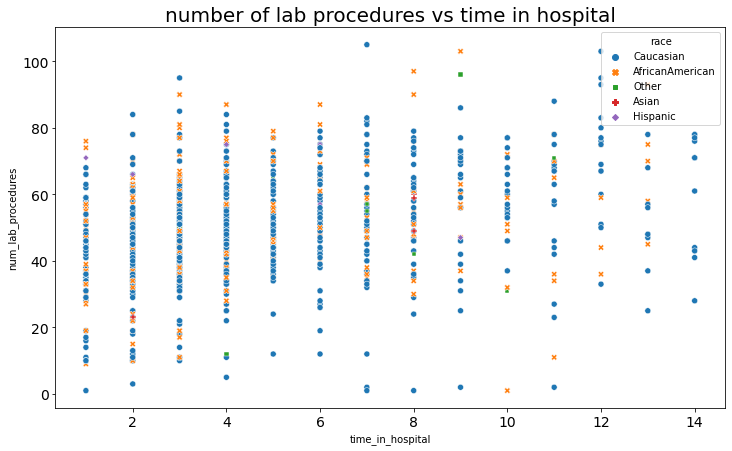

In [ ]:
plot_scatter(dfExp.head(1000), x_col="time_in_hospital", y_col="num_lab_procedures", hue="race",
             style="race", title="number of lab procedures vs time in hospital")

#### Box Plots

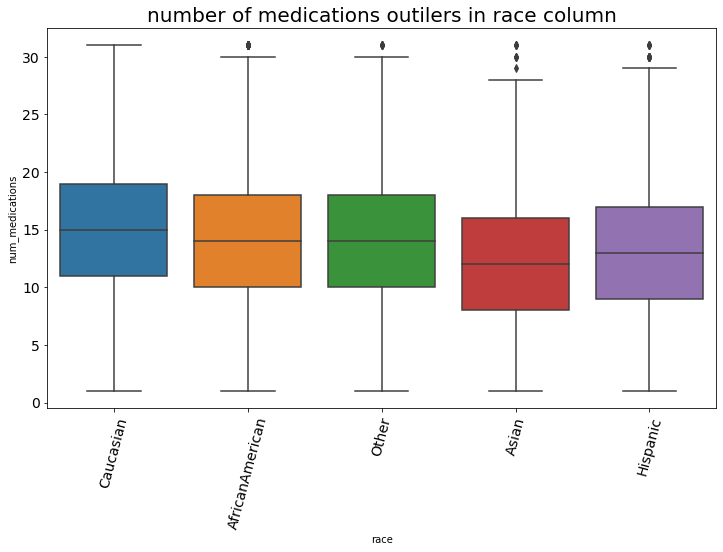

In [ ]:
plot_box_multi(dfExp, x_col="race", y_col="num_medications", title="number of medications outilers in race column")

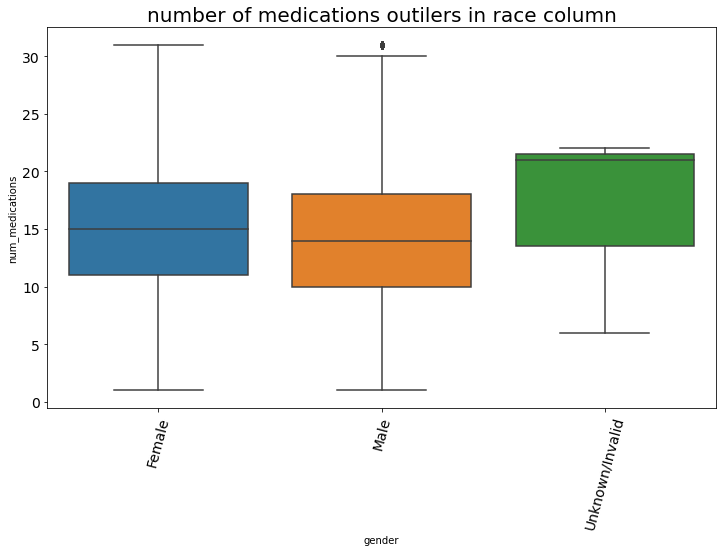

In [ ]:
plot_box_multi(dfExp, x_col="gender", y_col="num_medications", title="number of medications outilers in race column")

#### pair plots

pair plots also known as scatterplot matrix, they allow us to see both distributions of single columns and the relationship between two columns

In [ ]:
dfPair = dfExp[["race", "time_in_hospital", "num_procedures", "num_lab_procedures", "num_medications"]]

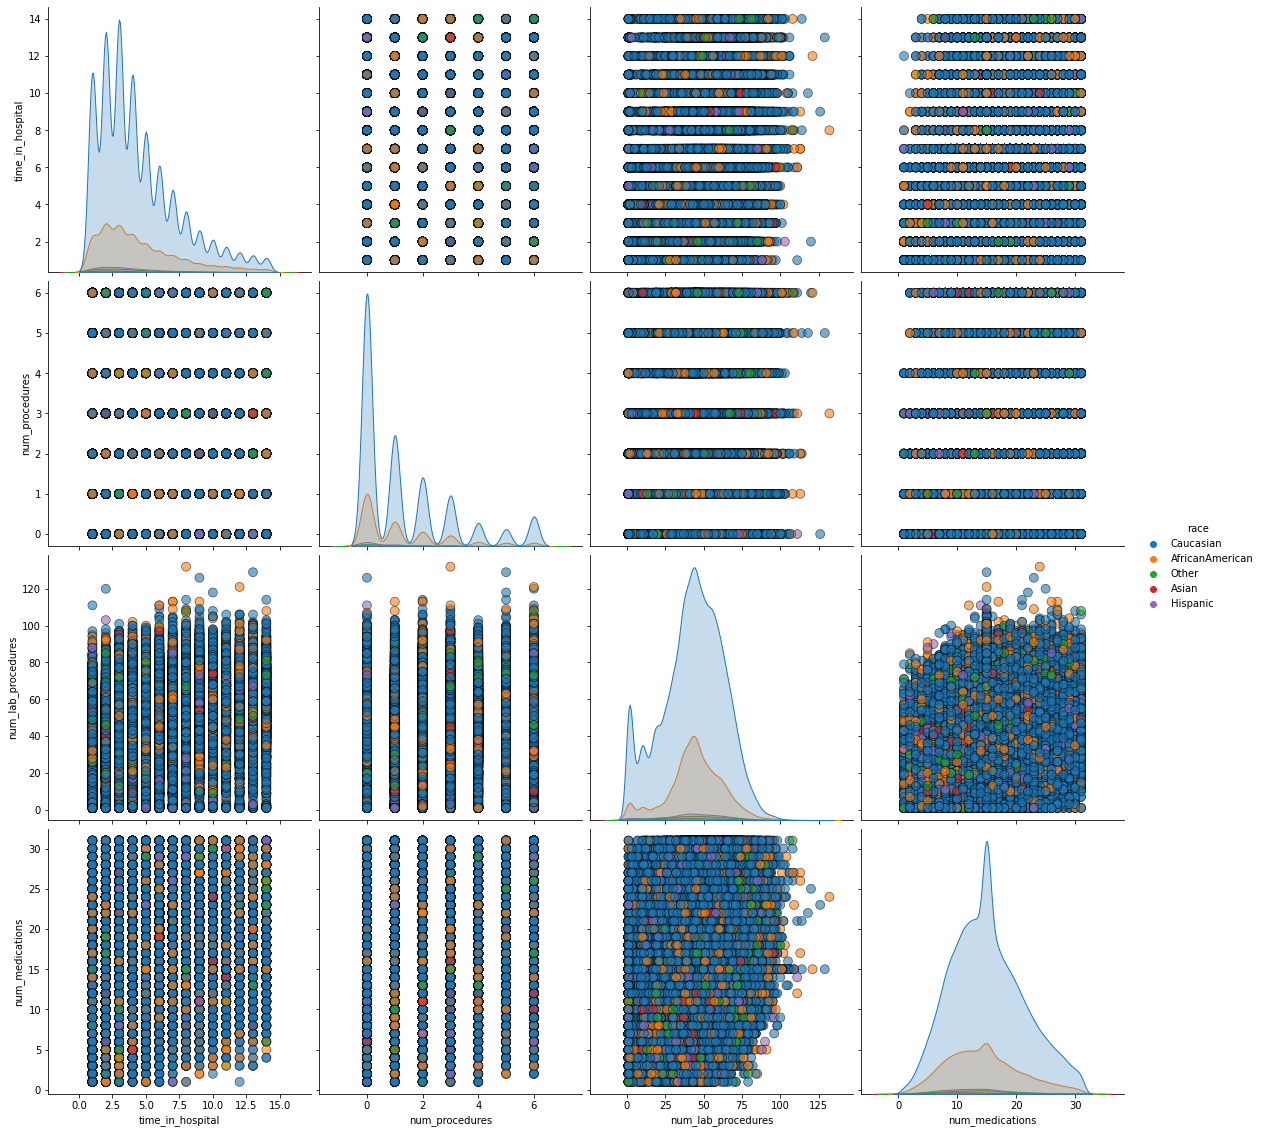

In [ ]:
sns.pairplot(dfPair, hue = 'race', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=4)

In [ ]:
df

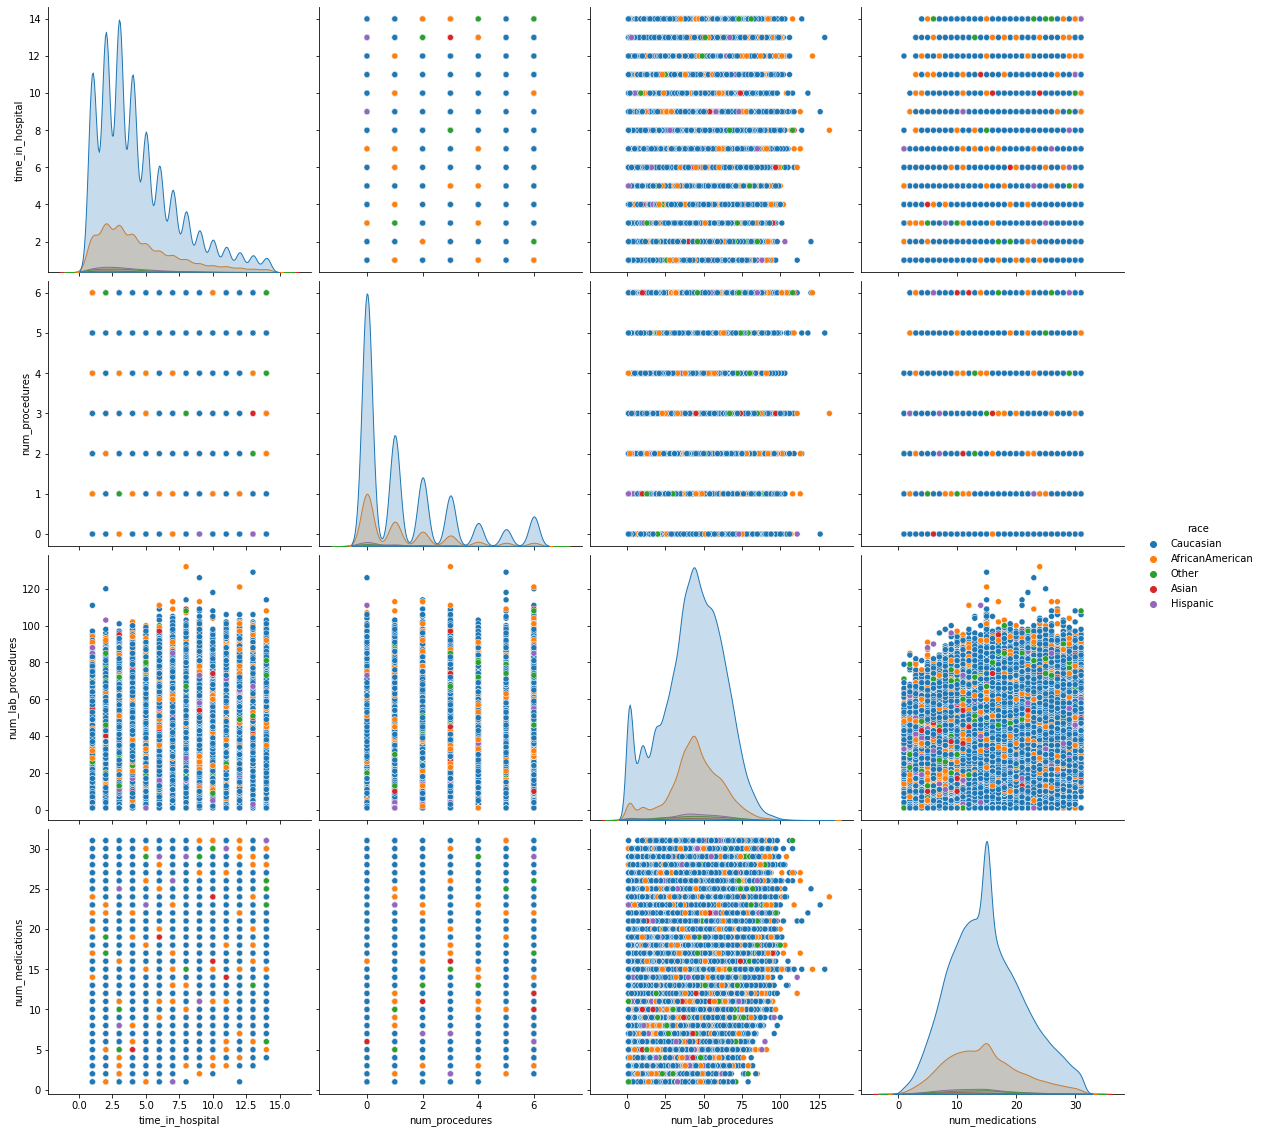

In [ ]:
sns.pairplot(dfPair, hue = 'race', diag_kind = 'kde',
             height=4)